<a href="https://colab.research.google.com/github/Sulthon-Araska/Basic-Computational-Astronomy-Astrostatistics/blob/main/Plot%20Bias%20%26%20Variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regresi Polinomial dengan Bias dan Varian**

Demo *overfitting*, *underfitting*, kurva validasi dan *learning curves* dalam regresi polinomial.

Derajat polinom yang berbeda diterapkan pada dataset. Untuk derajat terlalu kecil, model mengalami
*underfits*, sedangkan jika derajat terlalu besar, regresi menjadi overfit.

In [30]:
# @title **Import Libraries**
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## **Dataset**

Diambil contoh dataset deret waktu untuk hasil simulasi berisi beragam fitur parameter orbit asteroid: *a*, *e*, *i* (inklinasi), dan seterusnya. Namun akan ditinjau dulu regresi antara dua fitur: *e* (eksentrisitas) dan *i* (inklinasi orbit)

In [31]:
# @title Membaca CSV dataset
df = pd.read_csv('2021PH27N.csv')

In [32]:
# @title Regresi polinomial memanfaatkan modul `sklearn`
from sklearn import model_selection                     # Modul untuk memilih model regresi yang akan digunakan
from sklearn.pipeline import make_pipeline              # Modul untuk membuat pipeline pemrosesan data
from sklearn.linear_model import LinearRegression       # Modul untuk melakukan regresi linear
from sklearn.preprocessing import PolynomialFeatures    # Modul untuk melakukan regresi polinomial

In [33]:
# @title Ukuran baris dataset adalah 1000. Untuk test dataset diambil 30% dari dataset. Disepakati sumbu `x` adalah *e*, sumbu `y` adalah *i* atau `inc`

n_samples = len(df)   # Menghitung jumlah baris data dalam dataset
test_size = 0.3       # Mengalokasikan sejumlah 30% dari total data untuk test

# Menentukan fitur-fitur dari dataset yang akan dianalisis
x = df['e']
y = df['inc']

In [34]:
# @title Dataframe dibagi dua: dataframe untuk training, dan dataframe untuk test

# Memsisahkan data dalam dataset yang akan dialokasikan untuk model training dan model testing
df_train, df_test = model_selection.train_test_split(df, test_size=test_size)

x_train = df_train['e']     # Fitur pertama untuk model training
y_train = df_train['inc']   # Fitur kedua untuk model training
x_test  = df_test['e']      # Fitur pertama untuk model testing
y_test  = df_test['inc']    # Fitur kedua untuk model testing

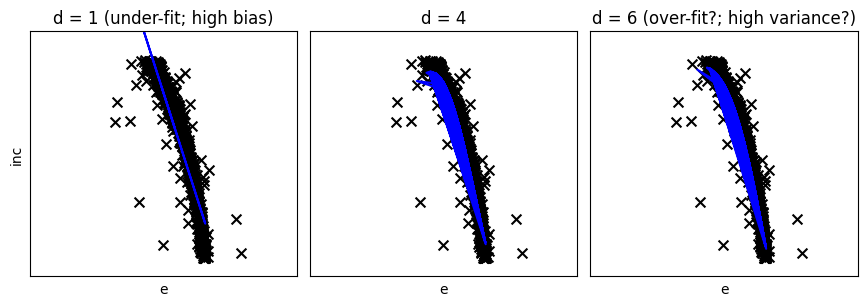

In [35]:
# @title Dicoba plot untuk 3 nilai derajat polinom. Kesimpulan derajat yang paling cocok di bagian-bagian akhir notebook ini.

# Menyiapkan judul-judul plot
titles = ['d = 1 (under-fit; high bias)',
          'd = 4',
          'd = 6 (over-fit?; high variance?)']

# Variasi derajat polinom
degrees = [1, 4, 6]

# Menyiapkan tampilan plot
fig = plt.figure(figsize=(9, 3.5))
fig.subplots_adjust(left=0.06, right=0.98, bottom=0.15, top=0.85, wspace=0.05)

# Iterasi uji coba regresi dengan 3 variasi derajat
for i, d in enumerate(degrees):
    ax = fig.add_subplot(131 + i, xticks=[], yticks=[])
    ax.scatter(x, y, marker='x', c='k', s=50)
    # Pembuatan model regresi
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(np.array(x)[:, np.newaxis], y)
    ax.plot(x_test, model.predict(np.array(x_test)[:, np.newaxis]), '-b')
    # Pembatasan rentang sumbu yang ditampilkan dalam plot
    ax.set_xlim(0.8*min(x), 1.1*max(x))
    ax.set_ylim(0.8*min(y), 1.1*max(y))
    ax.set_xlabel('e')
    if i == 0:
        ax.set_ylabel('inc')
    # Menuliskan judul tiap plot
    ax.set_title(titles[i])

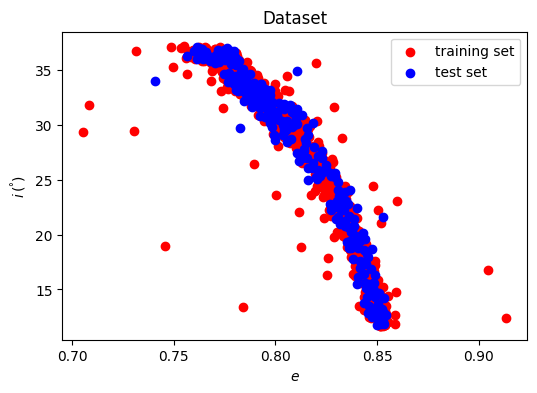

In [36]:
# @title *Plot training* dan test set
plt.figure(figsize=(6, 4))                                          # Ukuran plot
plt.scatter(x_train, y_train, color='red', label='training set')    # Menampilkan data-data yang digunakan untuk model training
plt.scatter(x_test, y_test, color='blue', label='test set')         # Menampilkan data-data yang digunakan untuk model testing
plt.title('Dataset')                                                # Judul scatter plot
plt.xlabel(r'$e$')                                                  # Label sumbu horizontal
plt.ylabel(r'$i\,(^{\degree})$')                                    # Label sumbu vertikal
plt.legend(loc='best')                                              # Legenda data

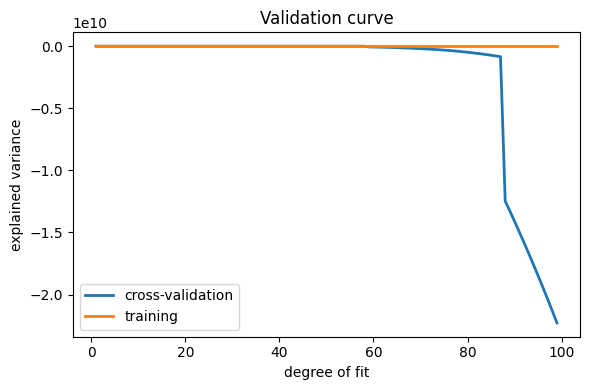

In [37]:
# @title Plot kurva validasi hingga derajat bernilai ekstrim, 100.

# Rentang derajat polinom
degrees = np.arange(1, 100)

# Pembuatan model regresi
model = make_pipeline(PolynomialFeatures(), LinearRegression())

# Parameter yang berubah di tahap pipeline adalah "degrees" (derajat polinom)
train_scores, validation_scores = model_selection.validation_curve(
                 model, np.array(x)[:, np.newaxis], y,
                 param_name='polynomialfeatures__degree',
                 param_range=degrees)

# Memplot eror rerata dari model training & model validation
plt.figure(figsize=(6, 4))
plt.plot(degrees, validation_scores.mean(axis=1), lw=2, label='cross-validation')
plt.plot(degrees, train_scores.mean(axis=1), lw=2, label='training')
plt.legend(loc='best')

plt.xlabel('degree of fit')        # Label sumbu horizontal
plt.ylabel('explained variance')   # Label sumbu vertikal
plt.title('Validation curve')      # Judul plot
plt.tight_layout()                 # Mengatur tata letak komponen dalam plot

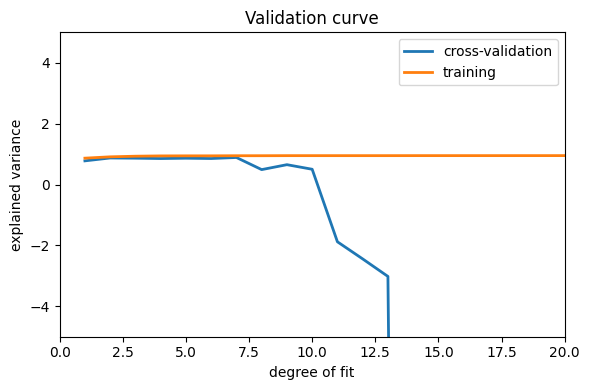

In [38]:
# @title Coba atur-atur lagi batas-batas plot untuk melihat detail perubahan nilai dari hasil validasi silang (*cross-validation*)

plt.figure(figsize=(6, 4))
plt.plot(degrees, validation_scores.mean(axis=1), lw=2, label='cross-validation')
plt.plot(degrees, train_scores.mean(axis=1), lw=2, label='training')
plt.legend(loc='best')
plt.xlim(0, 20)                    # Membatasi rentang sumbu horizontal
plt.ylim(-5, 5)                    # Membatasi rentang sumbu vertikal
plt.xlabel('degree of fit')        # Label sumbu horizontal
plt.ylabel('explained variance')   # Label sumbu vertikal
plt.title('Validation curve')      # Judul plot
plt.tight_layout()                 # Mengatur tata letak komponen dalam plot

## **Learning curves**

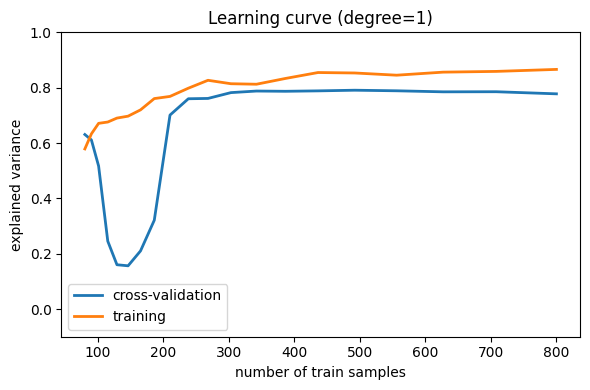

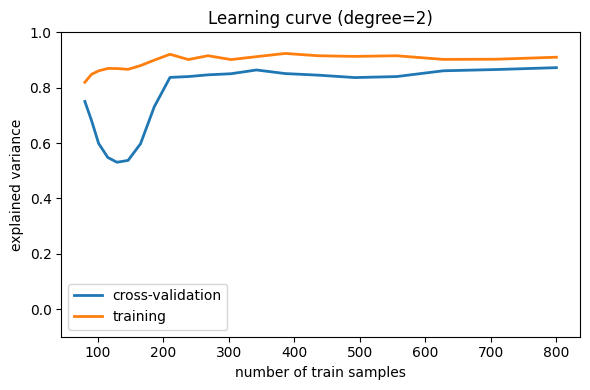

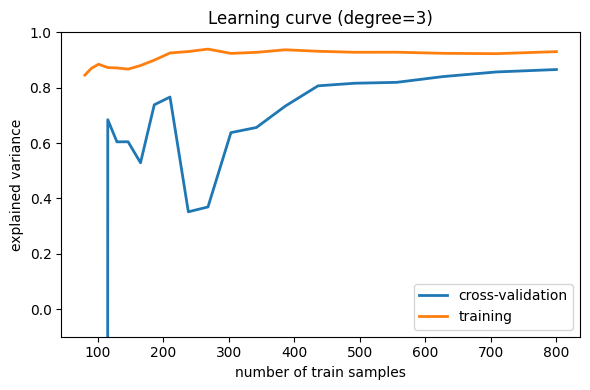

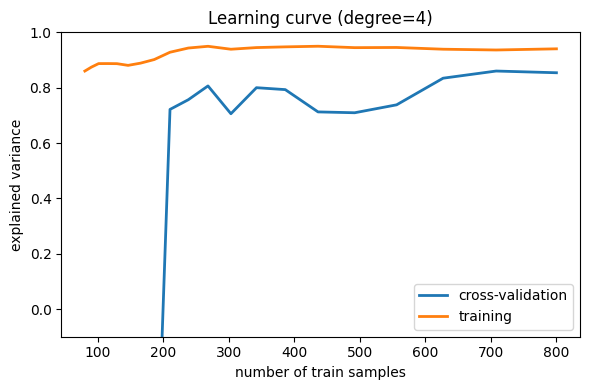

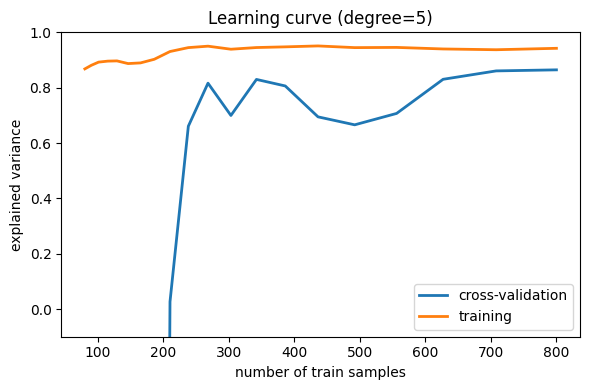

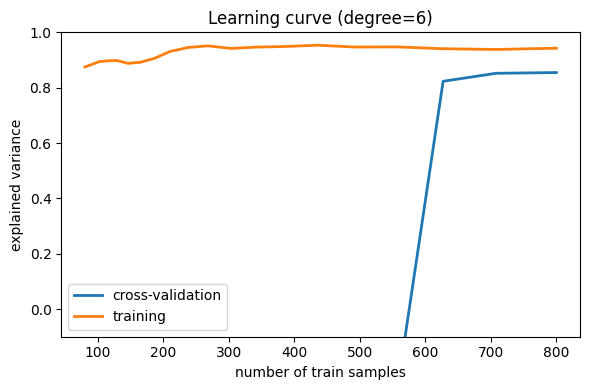

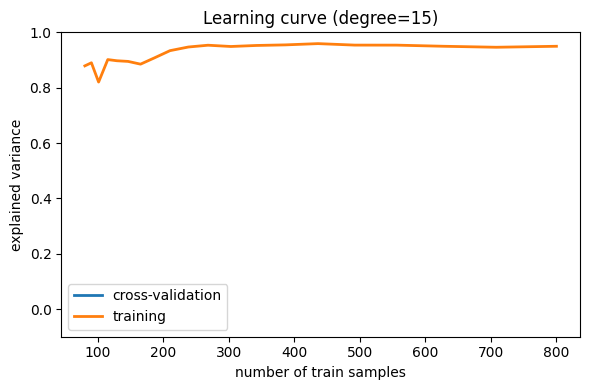

In [39]:
# @title Plot error pada *training* dan *test* menurut penambahan jumlah sampel data

# Mmebuat kurva pembelajaran untuk beberapa derajat polinom
for d in [1, 2, 3, 4, 5, 6, 15]:
    model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
    # Membuat kurva pembelajaran untuk model training & model validation
    train_sizes, train_scores, validation_scores = model_selection.learning_curve(
        model, np.array(x)[:, np.newaxis], y,
        train_sizes=np.logspace(-1, 0, 20))
    # Memplot eror rerata dari model training & model validation untuk berbagai nilai k-fold
    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes, validation_scores.mean(axis=1),
            lw=2, label='cross-validation')
    plt.plot(train_sizes, train_scores.mean(axis=1),
                lw=2, label='training')
    plt.ylim(ymin=-.1, ymax=1)

    plt.legend(loc='best')                        # Legenda dalam plot
    plt.xlabel('number of train samples')         # Label sumbu horizontal
    plt.ylabel('explained variance')              # Label sumbu vertikal
    plt.title('Learning curve (degree=%i)' % d)   # Judul plot
    plt.tight_layout()                            # Merapihkan tata letak komponen dalam plot

plt.show()   # Menampilkan plot

## **Apa kesimpulanmu?** Tulislah di baris-baris di bawah ini atau beri komentar di beberapa blok sebelumnya (di atas).

---
\
### **1. Kurva validasi hingga derajat ekstrim**
Ketika dilakukan plot kurva validasi hingga polinom derajat 100, terlihat bahwa model polinom hingga derajat sekitar 60 memiliki variansi yang *relatif* cukup baik (mendekati nol) dan variansi meningkat drastis untuk derajat di atas 80-an.

Akan tetapi, perlu diperhatikan bahwa kesimpulan ini terlalu "terburu-buru" karena sumbu vertikal (untuk nilai varaiansi) memiliki skala $10^5$ yang mana sangat besar. Apabila kita *zoom-in* untuk rentang *degree of fit* antara 0 dan 20, terlihat bahwa variansi mulai meningkat untuk derajat ≥7.

Dengan hanya pertimbangan variansi, dapat disimpulkan bahwa regresi polinom **derajat 1 hingga 6** adalah **model yang optimal** (tidak *underfit* maupun *overfit*).

\
### **2. Kurva Pembelajaran (*Learning Curves*)**
*Learning curves* memberikan gambaran seberapa banyak jumlah data (sumbu horizontal) yang dibutuhkan bagi model tersebut untuk mencapai nilai *variance* (sumbu vertikal) yang *relatif* konstan; semakin sedikit data yang diperlukan hingga mencapai variansi yang konstan, semakin *efisien* model tersebut. Hal lain yang menjadi kriteria penilaian adalah seberapa dekat nilai variansi *stabil* dari kurva *cross-validation* terhadap kurva *training*. \

Menurut dua kriteria yang telah disebutkan sebelumnya dan *learning curves* dari beberapa derajat polinom yang dicoba, didapat kesimpulan:\
**Polinom derajat 2 adalah model yang paling efisien**.

\
### **3. Simpulan**
Berdasarkan dua analisis di atas, disimpulkan bahwa **Regresi kuadratik (polinom derajat 2)** adalah **model paling optimal & efisien** untuk dataset ini.